In [1]:
# Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\sivar\Downloads\District_Statewise_Well.csv')


In [3]:
# Preprocessing
# Dropping irrelevant columns if needed (e.g., 'S.no.')
data = data.drop(columns=['S.no.'], errors='ignore')

In [4]:
# Handle missing values using forward fill
data.ffill(inplace=True)

In [5]:
# Target column for prediction: 'Net Ground Water Availability for future use'
target_column = 'Net Ground Water Availability for future use'


In [6]:
# Generate lag features for the past 3 months to create a time series structure
def create_lag_features(df, target_column, lags):
    for lag in range(1, lags + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    return df

In [7]:
# Encoding categorical columns like 'Name of State' and 'Name of District'
label_encoder = LabelEncoder()
data['Name of State'] = label_encoder.fit_transform(data['Name of State'])
data['Name of District'] = label_encoder.fit_transform(data['Name of District'])

In [8]:
# Create lag features for the past 3 months
data = create_lag_features(data, target_column, 3)

In [9]:
# Drop rows with NaN values due to lag feature creation
data.dropna(inplace=True)

In [10]:
# Split features and target
X = data.drop(columns=[target_column])
y = data[target_column]


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Model training with Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Prediction
y_pred = lr_model.predict(X_test)

In [14]:
# Evaluation using RMSE, MAE, and R-squared (R^2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [15]:
# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 7322.972274667175
MAE: 5129.853499257325
R^2: 0.9432510987290998


In [16]:
# Display the actual vs predicted values for the first 10 samples
actual_vs_predicted = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print(actual_vs_predicted)


     Actual     Predicted
0   5474.79  11747.500378
1  43833.19  38406.538772
2  23491.50  27370.425886
3  34950.75  41577.559720
4  27661.66  25187.824253
5    444.02    391.114276
6  27738.59  25833.671896
7   2463.00  -5433.624950
8  31411.54  23952.733723
9  27053.42  33649.510258


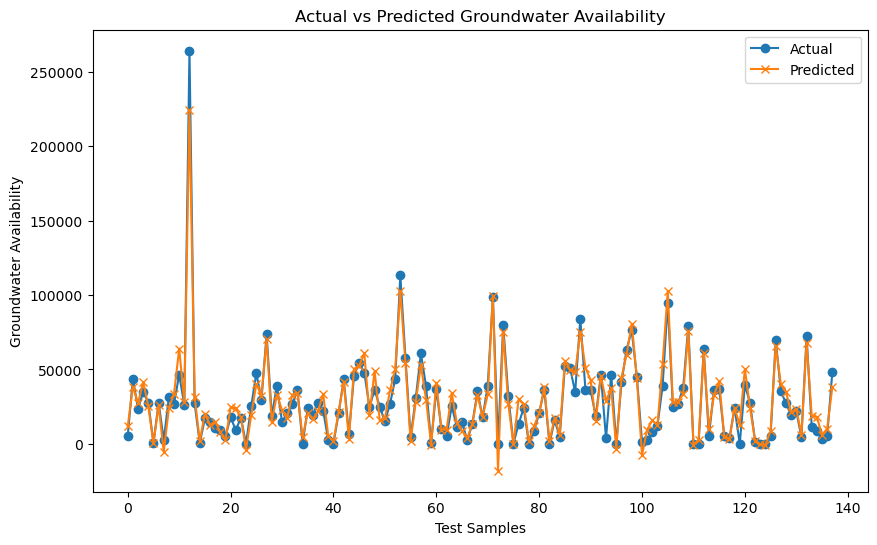

In [17]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("Actual vs Predicted Groundwater Availability")
plt.xlabel("Test Samples")
plt.ylabel("Groundwater Availability")
plt.show()
